# random asset exchange model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

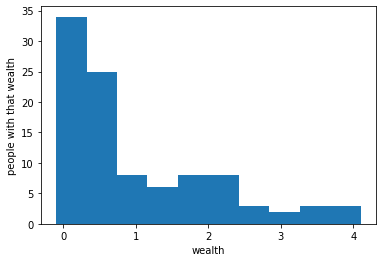

In [2]:
#basic plot
nsteps = 10000
npeople = 100
wealth = np.ones(npeople)
coin = 0.1

for t in range(nsteps):
    p1 = np.random.randint(low = 0, high = npeople)
    p2 = np.random.randint(low = 0, high = npeople)
    if(wealth[p1])>0:
        wealth[p1] -= coin
        wealth[p2] += coin
        
plt.hist(wealth);
plt.xlabel("wealth");
plt.ylabel("people with that wealth");

In [3]:
def gini(x):
    y = np.sort(x) # We need to sort them by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )

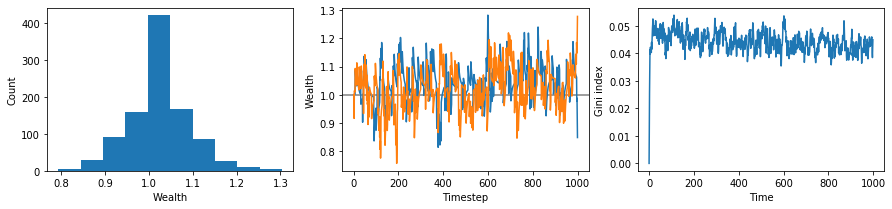

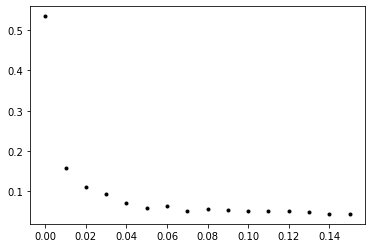

In [18]:
#history
nsteps = 1000
npeople = 100
trade_per_step = 10
interest = 0.000
coin = 0.1
taxrate = 0.01

wealth = np.ones(shape=(nsteps, npeople))
gini_history = np.zeros(nsteps)
taxrates = np.arange(start=0, stop=0.16,step=0.01)
final_gini = np.zeros(shape = taxrates.shape)

for itax in range(len(taxrates)):
    taxrate = taxrates[itax]
    for t in range(1, nsteps):
        wealth[t,:] = wealth[t-1,:] *(1+interest) 
        for i in range(trade_per_step):
            p1 = np.random.randint(low = 0, high = npeople)
            p2 = np.random.randint(low = 0, high = npeople)
            if(wealth[t,p1])>0:
                wealth[t,p1] = wealth[t-1,p1] - coin 
                wealth[t,p2] = wealth[t-1,p2] + coin
        gini_history[t] = gini(wealth[t,:]) 

        tax = (taxrate*np.sum(wealth[t,:]))
        wealth[t,:] = wealth[t,:]*(1-taxrate)
        wealth[t,:] += tax/npeople
        
    final_gini[itax] = gini_history[-1]
    
    
    
plt.figure(figsize=(15,3));
plt.subplot(1,3,1);
plt.hist(wealth[:,0]);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
#plt.plot(wealth[-1,:]);
plt.axhline(1,color='gray')
poor_one = np.argmin(wealth[-1,:]);
rich_one = np.argmax(wealth[-1,:]);
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('Timestep');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');

plt.figure();
plt.plot(taxrates, final_gini, 'k.');
